#  YeFeng_assignment3_option1
Last week I finished the option2 and this week I am gonna produce the requested visualizations using pandas

I finished these 4 listed below to visualize: 

·Relationship between the year acquired and the year constructed

·Total square footage as a function of congressional district ("Congress Dist")

·Average square footage per floor as a function of congressional district

·Square footage for the five most common departments (aka "Agency Name") as a function of year.  Here "most common" refers to the departments with the most entries in the table.  You can choose year acquired or year constructed (or some sort of average of the two!), just make sure you state which you chose and why.

In [1]:
%matplotlib inline

In [2]:
import matplotlib
import matplotlib.pyplot as plt # shorthand for importing
import numpy as np # shorthand

In [3]:
import pandas as pd

In [4]:
buildings = pd.read_csv('building_inventory.csv',
                        na_values={'Square Footage': 0, 
                         'Year Acquired': 0,
                         'Year Constructed': 0, 
                         'Floors':0}) # this is if the file is stored locally

In [5]:
buildings.head(5)

,Agency Name,Location Name,Address,City,Zip code,County,Congress Dist,Congressional Full Name,Rep Dist,Rep Full Name,...,Bldg Status,Year Acquired,Year Constructed,Square Footage,Total Floors,Floors Above Grade,Floors Below Grade,Usage Description,Usage Description 2,Usage Description 3
0,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,1975.0,1975.0,144.0,1,1,0,Unusual,Unusual,Not provided
1,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004.0,2004.0,144.0,1,1,0,Unusual,Unusual,Not provided
2,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004.0,2004.0,144.0,1,1,0,Unusual,Unusual,Not provided
3,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004.0,2004.0,144.0,1,1,0,Unusual,Unusual,Not provided
4,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004.0,2004.0,144.0,1,1,0,Unusual,Unusual,Not provided


In [6]:
buildings.index

RangeIndex(start=0, stop=8862, step=1)

# Relationship between the year acquired and the year constructed

For this visualization, I tried several different kind of graph. The line chart and bar chart do not make any sense for this data. The best result that can show the relationship between the year acquired and the year constructed are from scatter chart which is shown below. We can see there is a line constructed by dots in the graph. Such line shows there is a nearly linear relationship between the year acquired and the year constructed.

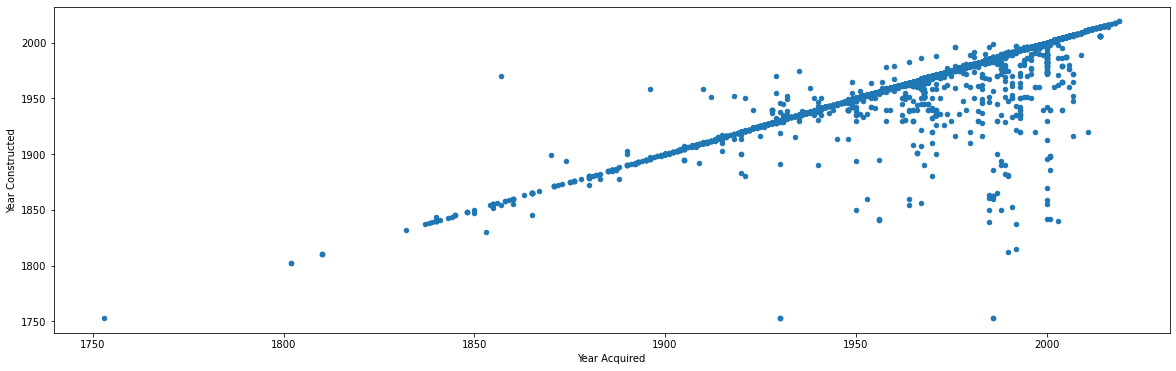

In [7]:
buildings.plot(x="Year Acquired", y="Year Constructed", figsize=(20,6), kind='scatter') 
plt.show()

# Total square footage as a function of congressional district ("Congress Dist")
This visualization is simple. I just use the groupby function given in the inClass_week04 file.
One problem I have is about the ylable. The automated xlabel is from the groupby function but we need to define the y label by hand.
I tried aggregated_data.plot(y="Total square footage of congressional district") but that faild.
So I use matplotlib in this case to set the title and y label

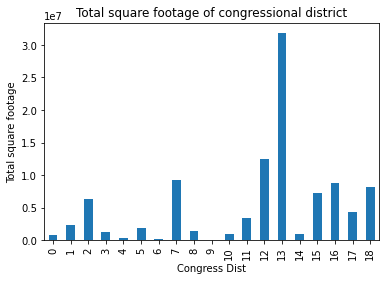

In [8]:
aggregated_data = buildings.groupby("Congress Dist")["Square Footage"].sum()
plt.title("Total square footage of congressional district")
plt.ylabel("Total square footage")
aggregated_data.plot(kind='bar')

# Average square footage per floor as a function of congressional district ("Congress Dist")

At first I think this is building.groupby("Congress Dist")["Square Footage"].mean(), but then I realize there is an average per floor requirments that has to use the total floors in the table.


So I found the apply()function.

From the pandas document, we can see that GroupBy.apply(func, *args, **kwargs) applys function func group-wise and combine the results together.

The function passed to apply must take a dataframe as its first argument and return a dataframe, a series or a scalar. apply will then take care of combining the results back together into a single dataframe or series. apply is therefore a highly flexible grouping method.

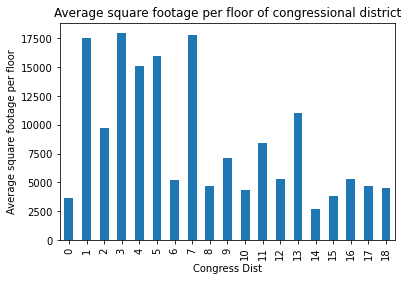

In [9]:
aggregated_data = buildings.groupby("Congress Dist").apply(lambda x:  x["Square Footage"].sum()/x["Total Floors"].sum())
plt.title("Average square footage per floor of congressional district")
plt.ylabel("Average square footage per floor")
aggregated_data.plot(kind='bar')

# Square footage for the five most common departments (aka "Agency Name") as a function of year. 

Here "most common" refers to the departments with the most entries in the table.  You can choose year acquired or year constructed (or some sort of average of the two!), just make sure you state which you chose and why.

Answer: I choose the year acquired because this may more related to the selling situation of square footage

First get the five most common departments name using Value_counts

In [10]:
common_departments = buildings.value_counts("Agency Name").reset_index(name='counts').head(5)
common_departments

,Agency Name,counts
0,Department of Natural Resources,3223
1,Department of Corrections,1428
2,Department of Transportation,1137
3,Department of Human Services,617
4,University of Illinois,525


In [11]:
building_slices = buildings.loc[buildings["Agency Name"].isin(common_departments["Agency Name"])]

At last I use groupby to get the sum of Square Footage from the filtered dataframe

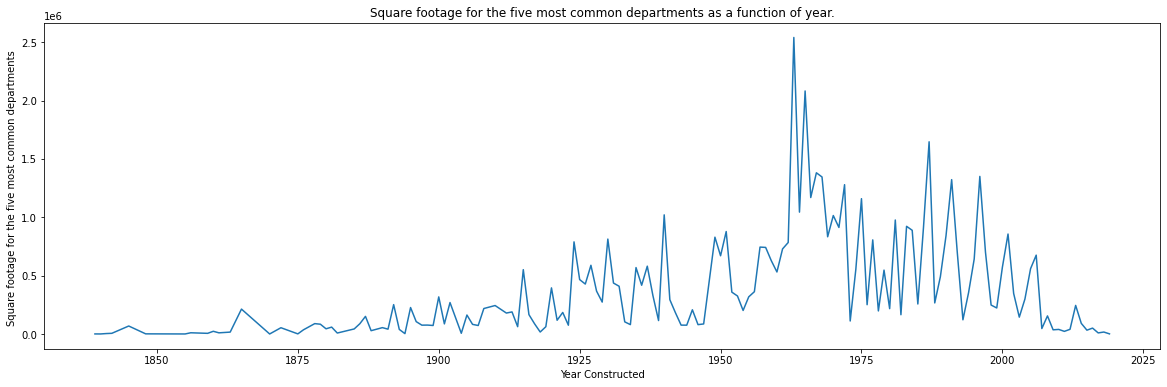

In [13]:
result = building_slices.groupby("Year Constructed")["Square Footage"].sum()
plt.title("Square footage for the five most common departments as a function of year.")
plt.ylabel("Square footage for the five most common departments ")
result.plot( figsize=(20,6))